## Lead Scoring Case Study
### X Education - Leads Dataset
* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
* A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### The steps are:
1. Read and understand the data
2. Clean and prepare the data
3. Build logistic regression model
4. Evaluation of the model
5. Predictions and lead scoring

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import math

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For train-test split
from sklearn.model_selection import train_test_split

# For rescaling
from sklearn.preprocessing import MinMaxScaler

# For model building
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For model evaluation
from sklearn import metrics

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Read and understand the data

In [2]:
# Read data from csv file to a dataframe
leads_df = pd.read_csv("Leads.csv")

# Check head of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check shape of the dataframe
leads_df.shape

(9240, 37)

In [4]:
# Check column-wise info and missing data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# Check summary statistics for numeric columns
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Clean and prepare the data
#### Steps include:
1. Redundant columns
2. Transformation & EDA
3. Encoding variables
4. Missing data
5. Outlier treatment

In [6]:
# Check value counts of categorical variables
for col in leads_df.select_dtypes('object').columns:
    print(leads_df[col].value_counts())
    print()

46327044-f3df-40d5-a275-4e276883dabb    1
1d518595-7bcf-439c-a8d0-13e60da46a77    1
c71d3607-11d9-4ea4-909d-e941a79ff97e    1
7a254494-6496-4acc-9a75-1908048f4cf5    1
ae8898c2-a228-4cfc-9510-43cc6bd05ec4    1
                                       ..
a732de28-542e-48c4-abe1-af4067853627    1
39a3962f-3a8e-4c23-9ad6-8757c8c83788    1
57e65ff3-f394-4d40-a3b1-87ebd5973d75    1
f6d12a68-057f-4b4d-850e-4daa4f15caec    1
1e5ee427-c2f8-41e5-a49c-b88ccc781838    1
Name: Prospect ID, Length: 9240, dtype: int64

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Releas

In [7]:
# Check percentage of missing data in columns
round(100*leads_df.isnull().sum()/len(leads_df), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Redundant columns

In [8]:
# Drop columns with only one value
cate1 = ['Magazine','Receive More Updates About Our Courses',
        'Update me on Supply Chain Content','Get updates on DM Content',
        'I agree to pay the amount through cheque']
leads_df = leads_df.drop(cate1, axis=1)

In [9]:
# Drop columns with very high inequality which cannot be used for inferences
leads_df = leads_df.drop(['Do Not Call','What matters most to you in choosing a course',
                          'Search','Newspaper Article','X Education Forums', 'Newspaper',
                          'Digital Advertisement','Through Recommendations'], axis =1)

In [10]:
# Drop columns with high percentage (> 40%) of missing data
leads_df = leads_df.drop(['Lead Quality','Asymmetrique Activity Index',
                          'Asymmetrique Profile Index','Asymmetrique Activity Score',
                          'Asymmetrique Profile Score'], axis =1)

In [11]:
# Check shape of the dataframe
leads_df.shape

(9240, 19)

#### Transformation of data

In [12]:
# Check value counts of 'Country' column
leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
China                      2
Netherlands                2
Bangladesh                 2
Belgium                    2
Italy                      2
Uganda                     2
Philippines                2
Asia/Pacific Region        2
Ghana                      2
Sri Lanka                  1
Switzerland                1
Tanzania                   1
Russia                     1
Liberia                    1
Malaysia                   1
Denmark       

In [13]:
# Impute missing values for country with the most frequent value
leads_df["Country"] = leads_df["Country"].fillna("India")

In [14]:
# Check value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
# Impute missing values for occupation with the most frequent value
leads_df["What is your current occupation"] = leads_df["What is your current occupation"].fillna("Unemployed")

In [16]:
# Check value counts of 'City' column
leads_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
# Impute missing values for city with 'Mumbai' if country is 'India'
conditions = [leads_df["Country"]=="India", leads_df["Country"]!="India"]
values = ['Mumbai', 'Other Cities']
leads_df["City"] = np.where(leads_df["City"].isnull(), np.select(conditions,values),
                            leads_df["City"])

In [18]:
# Check value counts of 'Lead Source' column
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

In [19]:
# Impute missing values for lead source with the most frequent value
leads_df["Lead Source"] = leads_df["Lead Source"].fillna("Google")

# Label similar values correctly
leads_df["Lead Source"] = leads_df["Lead Source"].replace("google","Google")

# Combine 'Social Media' and 'Facebook' as they have fewer occurrences
leads_df["Lead Source"] = leads_df["Lead Source"].replace("Facebook","Social Media") 

# Combine other values with fewer occurrences as 'Other_Source'
leads_df["Lead Source"] = leads_df["Lead Source"].replace(['blog','Pay per Click Ads','bing','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release',
                                                           'NC_EDM'], "Other_Source")

In [20]:
# Check value counts of 'Last Activity' column
leads_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [21]:
# Impute missing values for last activity with the most frequent value
leads_df["Last Activity"] = leads_df["Last Activity"].fillna("Email Opened")

# Combine values with fewer occurrences as 'Other_Activity'
leads_df["Last Activity"] = leads_df["Last Activity"].replace(['Visited Booth in Tradeshow','Resubscribed to emails','Email Received','Approached upfront','View in browser link Clicked',
                                                               'Email Marked Spam'], "Other_Activity")

In [22]:
# Check value counts of 'Last Notable Activity' column
leads_df["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [23]:
# Combine values with fewer occurrences as 'Other_Notable_Activity'
leads_df["Last Notable Activity"] = leads_df["Last Notable Activity"].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received',
                                                                               'Email Marked Spam'], "Other_Notable_Activity")

#### Exploratory data analysis (EDA)

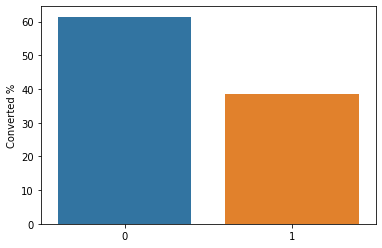

In [24]:
# Check data imbalance (1 means the lead is converted)
imbalance = 100*leads_df['Converted'].value_counts()/len(leads_df['Converted'])
sns.barplot(x=[0,1], y=imbalance)
plt.ylabel("Converted %");

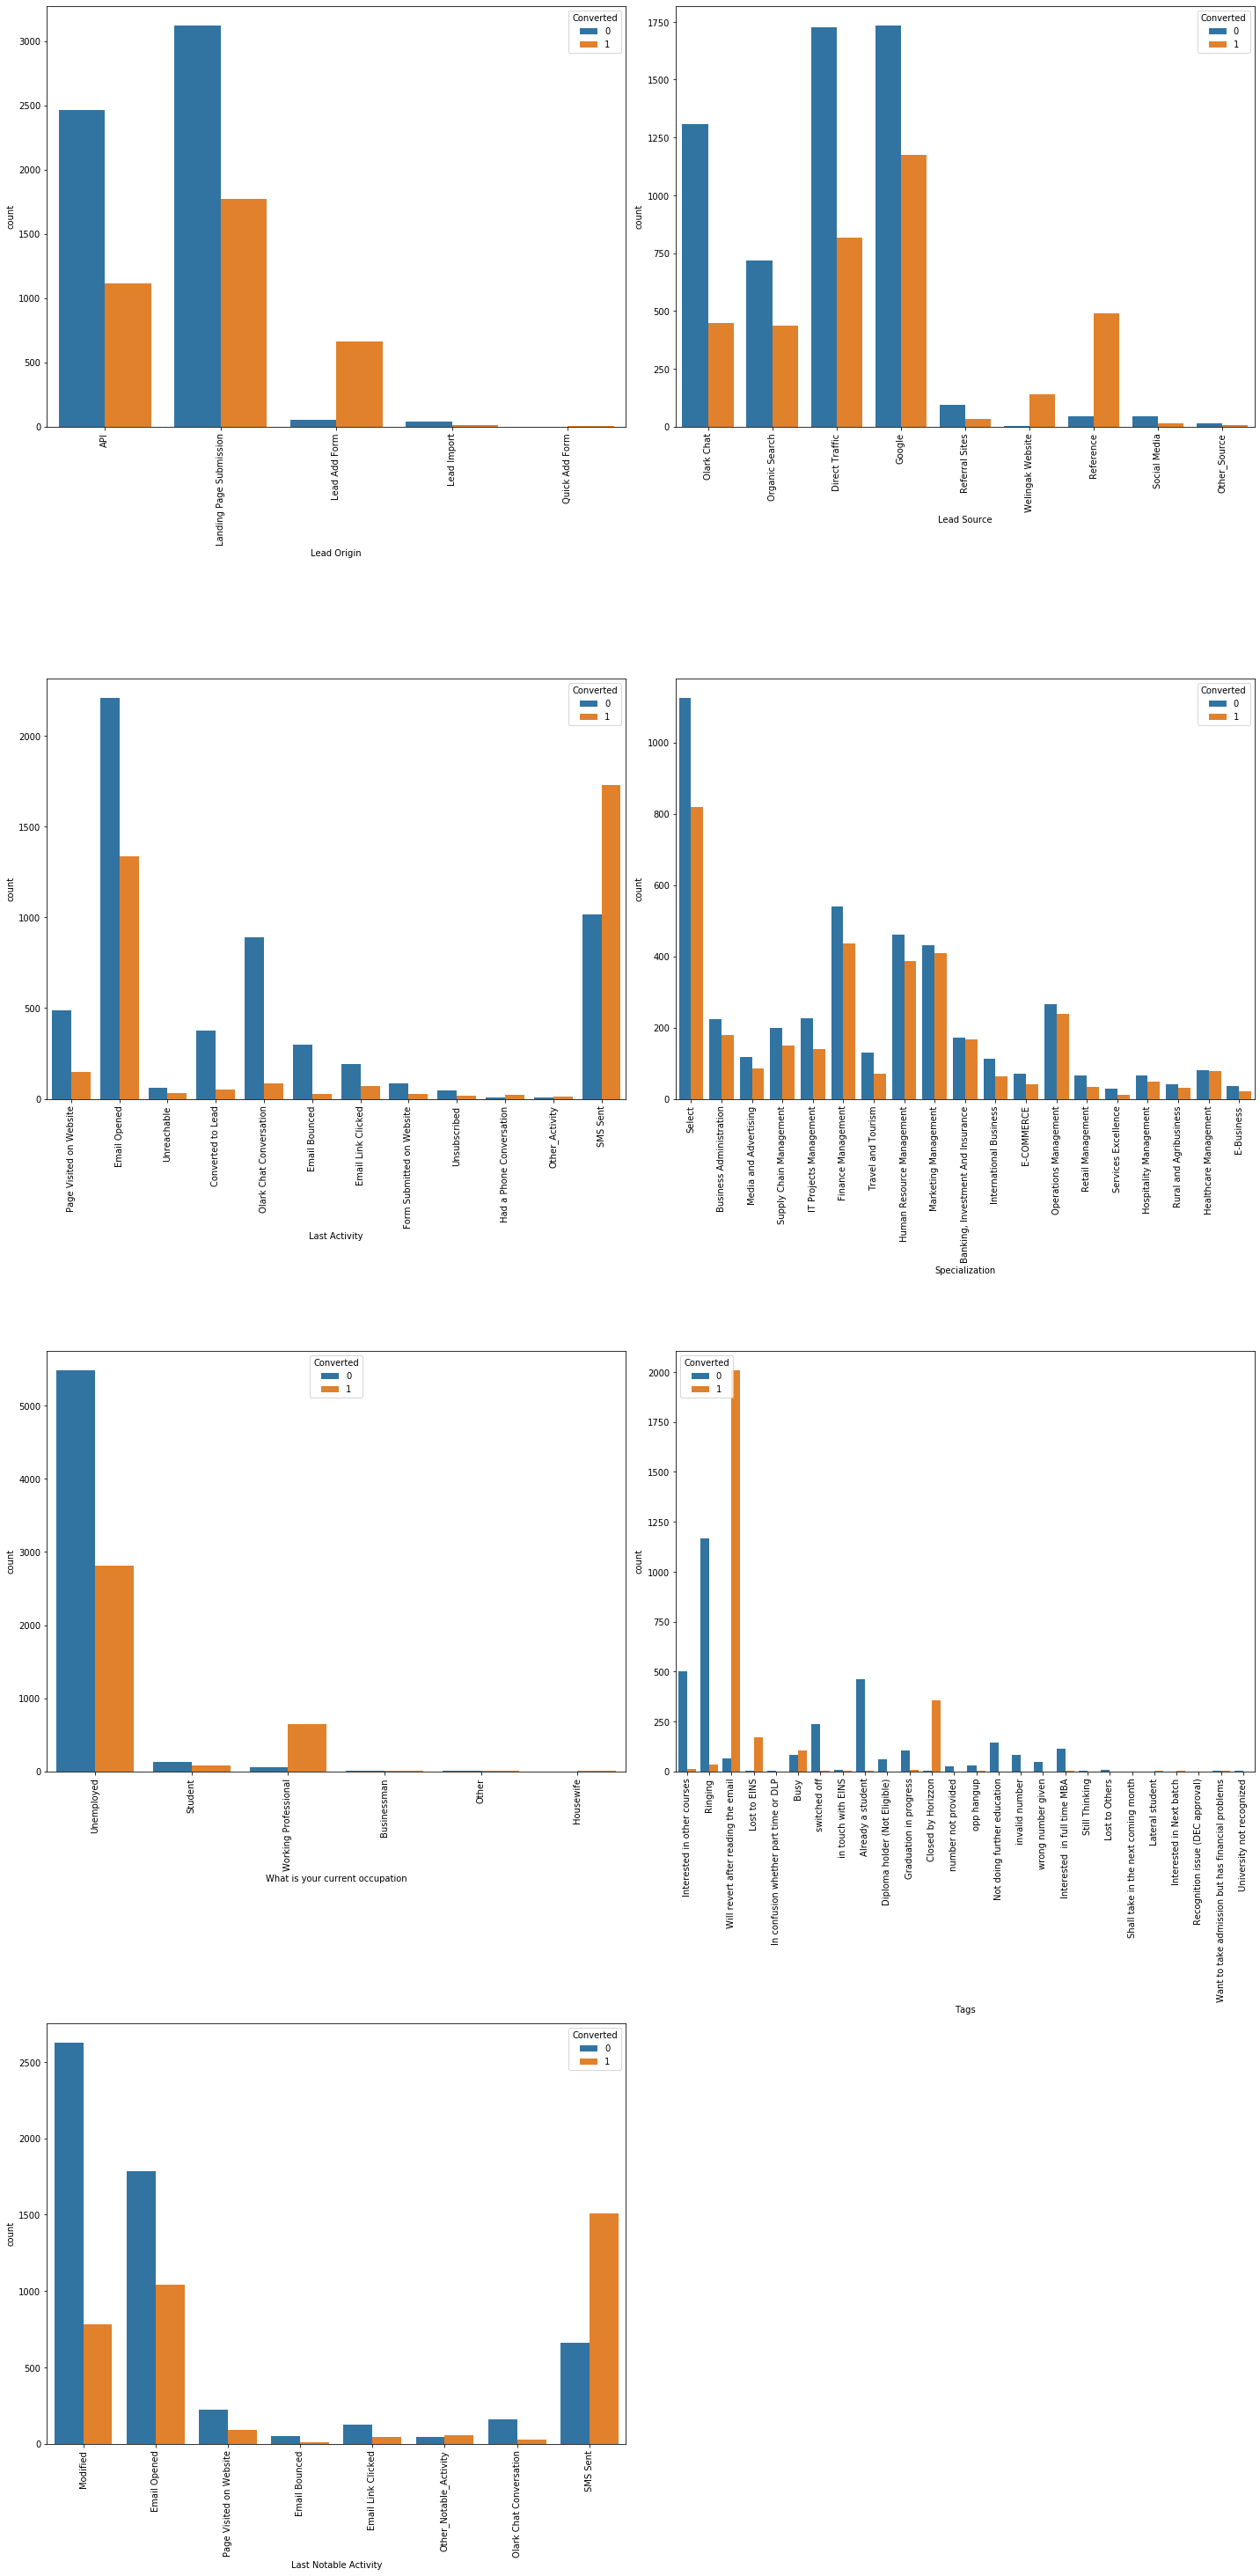

In [25]:
# Define categorical columns for EDA
cat_col = ["Lead Origin","Lead Source","Last Activity","Specialization",
           "What is your current occupation","Tags","Last Notable Activity"]

# EDA for the categorical columns
plt.figure(figsize=(20,60))
i = 1
for items in cat_col:
    plt.subplot(6,2,i)
    sns.countplot(leads_df[items], hue=leads_df["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()
    i += 1

* Lead Origin: Most of the leads are coming through “API” or “Landing Page Submission”. The conversion rate for “Lead Import” is high.
* Lead Source: The conversion rates are very high for leads sourced from “Reference” and “Welingak Website” (though data points are less).
* Last Activity: The leads with last activity as "Email Opened" are the highest, whereas the conversion rate is very high for the leads with last activity as "SMS Sent".
* Tags: The leads with Tag as "Will revert back after reading the email" have significantly higher conversion rate. The leads with Tag as "Closed by Horizon" seem to have already converted.
* Occupation: The conversion rate is very high for “Working Professional”.
* Last Notable Activity: The leads with last notable activity as “SMS Sent" have significantly higher conversion rate.

#### Encoding variables

In [26]:
# Convert binary variables to 1/0
cate2 = ['Do Not Email','A free copy of Mastering The Interview']
for col in cate2:
    leads_df[col] = leads_df[col].map({'Yes':1, 'No':0})

# Check the converted variables
leads_df[cate2].describe()

,Do Not Email,A free copy of Mastering The Interview
count,9240.000000,9240.000000
mean,0.079437,0.312554
std,0.270435,0.463559
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [27]:
# Columns with "Select" value which can be considered as null value
cate3 = ['Specialization','How did you hear about X Education','Lead Profile','City']

for col in cate3:
    # Create dummy variables
    dum = pd.get_dummies(leads_df[col], prefix=col)
    # Drop "Select" column
    dum = dum.drop([col+'_Select'], axis=1)
    # Add the dummies to the master dataframe
    leads_df = pd.concat([leads_df,dum], axis=1)
    # Drop the repeated variable
    leads_df = leads_df.drop(col, axis=1)

# Check head of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,1,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,1,0,0,0,0,0


In [28]:
# Create and add dummy variables for the other categorical variables
cate4 = ['Lead Origin','Lead Source','Last Activity','Country',
         'What is your current occupation','Tags','Last Notable Activity']
leads_df = pd.get_dummies(columns=cate4, data = leads_df, drop_first=True)

# Check head of the dataframe
leads_df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Missing data

In [29]:
# Check percentage of missing data in columns
pd.set_option('display.max_rows', None)
round(100*leads_df.isnull().sum()/len(leads_df.index), 2)

Prospect ID                                                 0.00
Lead Number                                                 0.00
Do Not Email                                                0.00
Converted                                                   0.00
TotalVisits                                                 1.48
Total Time Spent on Website                                 0.00
Page Views Per Visit                                        1.48
A free copy of Mastering The Interview                      0.00
Specialization_Banking, Investment And Insurance            0.00
Specialization_Business Administration                      0.00
Specialization_E-Business                                   0.00
Specialization_E-COMMERCE                                   0.00
Specialization_Finance Management                           0.00
Specialization_Healthcare Management                        0.00
Specialization_Hospitality Management                       0.00
Specialization_Human Reso

In [30]:
# Drop rows with missing values in 'TotalVisits' and 'Page Views Per Visit'
leads_df = leads_df[~np.isnan(leads_df['TotalVisits']) &
                    ~np.isnan(leads_df['Page Views Per Visit'])]

# Check shape of the dataframe
leads_df.shape

(9103, 143)

In [31]:
# Check percentage of missing data again
round(100*leads_df.isnull().sum()/len(leads_df.index), 2)

Prospect ID                                                 0.0
Lead Number                                                 0.0
Do Not Email                                                0.0
Converted                                                   0.0
TotalVisits                                                 0.0
Total Time Spent on Website                                 0.0
Page Views Per Visit                                        0.0
A free copy of Mastering The Interview                      0.0
Specialization_Banking, Investment And Insurance            0.0
Specialization_Business Administration                      0.0
Specialization_E-Business                                   0.0
Specialization_E-COMMERCE                                   0.0
Specialization_Finance Management                           0.0
Specialization_Healthcare Management                        0.0
Specialization_Hospitality Management                       0.0
Specialization_Human Resource Management

In [32]:
pd.reset_option('display.max_rows')

#### Outlier treatment

In [33]:
# Check percentiles at 25, 50, 75, 90, 95, 99, for continuous variables
cont1 = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_df[cont1].describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000
99%,1.000000,17.000000,1838.960000,9.000000


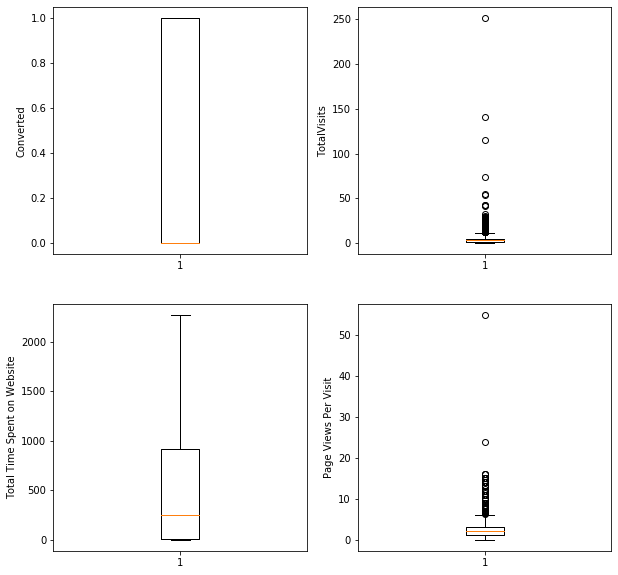

In [34]:
# Check for outliers using boxplots
plt.figure(figsize=(10,10))
for i in range(len(cont1)):
    plt.subplot(math.ceil(len(cont1)/2), 2, i+1)
    plt.boxplot(leads_df[cont1[i]])
    plt.ylabel(cont1[i])

In [35]:
# Remove statistical outliers from 'TotalVisits' and 'Page Views Per Visit' columns
cont2 = ['TotalVisits','Page Views Per Visit']
for col in cont2:
    q1 = leads_df[col].quantile(0.25)
    q3 = leads_df[col].quantile(0.75)
    iqr = q3 - q1
    leads_df = leads_df[(leads_df[col]>=(q1-1.5*iqr)) & (leads_df[col]<=(q3+1.5*iqr))]

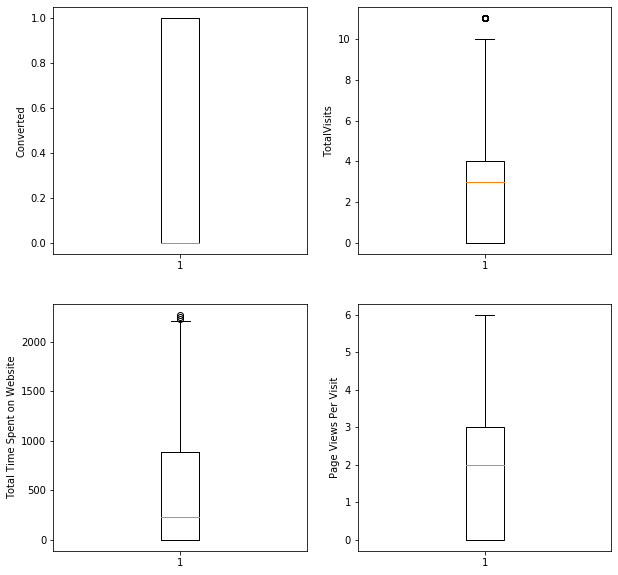

In [36]:
# Check for outliers again
plt.figure(figsize=(10,10))
for i in range(len(cont1)):
    plt.subplot(math.ceil(len(cont1)/2), 2, i+1)
    plt.boxplot(leads_df[cont1[i]])
    plt.ylabel(cont1[i])

In [37]:
# Check shape of the dataframe
leads_df.shape

(8542, 143)

After missing data and outlier treatment, we have retained > 90% of the data.

#### Separate lead identifiers

In [38]:
# Separate 'Prospect ID' column
prospect_id = leads_df.pop('Prospect ID')

# Separate 'Lead Number' column
lead_number = leads_df.pop('Lead Number')

# Check shape of the dataframe
leads_df.shape

(8542, 141)

### 3. Build logistic regression model
#### Steps include:
1. Train-test split
2. Rescaling features
3. Build and train the model
    * Recursive feature elimination
    * Manual feature selection

#### Lead conversion rate

In [39]:
# Check the lead conversion rate
round(100*sum(leads_df['Converted'])/len(leads_df['Converted']), 2)

37.84

#### Train-test split

In [40]:
# Put feature variables to X
X = leads_df.drop('Converted', axis=1)

# Put response variable to y
y = leads_df['Converted']

In [41]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                    random_state=100)

# Check shape of the train and test dataframes
print(X_train.shape)
print(X_test.shape)

(5979, 140)
(2563, 140)


In [42]:
# Check head of the train dataframe
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1384,0,5.0,286,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3514,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5930,0,4.0,635,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1409,0,2.0,2,2.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Rescaling features

We will use normalisation (MinMax scaling, min=0, max=1).

In [43]:
# Select the continuous variables to scale
cont3 = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Instantiate scaler object
scaler = MinMaxScaler()

# Fit and transform on the train set
X_train[cont3] = scaler.fit_transform(X_train[cont3])

In [44]:
# Check summary statistics for train set after normalisation (min=0, max=1)
X_train[cont3].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5979.000000,5979.000000,5979.000000
mean,0.256200,0.207037,0.344034
std,0.223769,0.240512,0.274321
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.272727,0.102553,0.333333
75%,0.363636,0.391505,0.500000
max,1.000000,1.000000,1.000000


#### Build and train the model

#### Recursive feature elimination (RFE), for coarse tuning

In [45]:
# Create logistic regression object
logreg = LogisticRegression()

# Fit on train data
logreg.fit(X_train, y_train)

# Run RFE with number of output variables as 15
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [46]:
# Check results with ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 14),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('A free copy of Mastering The Interview', False, 98),
 ('Specialization_Banking, Investment And Insurance', False, 63),
 ('Specialization_Business Administration', False, 85),
 ('Specialization_E-Business', False, 79),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 80),
 ('Specialization_Healthcare Management', False, 62),
 ('Specialization_Hospitality Management', False, 81),
 ('Specialization_Human Resource Management', False, 109),
 ('Specialization_IT Projects Management', False, 95),
 ('Specialization_International Business', False, 35),
 ('Specialization_Marketing Management', False, 59),
 ('Specialization_Media and Advertising', False, 66),
 ('Specialization_Operations Management', False, 64),
 ('Specialization_Retail Management', False, 77),
 ('Specialization_Rural and Agribusiness', False, 67),
 

In [47]:
# Include results from RFE
cols = X_train.columns[rfe.support_]
X = X_train[cols]
X.columns

Index(['Total Time Spent on Website', 'Lead Profile_Student of SomeSchool',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified'],
      dtype='object')

#### First model with statsmodels (GLM)

In [48]:
# Add a constant
X_train_sm = sm.add_constant(X)

# Create the first model
logr1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model
logm1 = logr1.fit()

# Check summary of the model
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.9
Date:                Mon, 02 Mar 2020   Deviance:                       2451.8
Time:                        22:15:58   Pearson chi2:                 8.39e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1429      0.093    -23.130      0.000      -2.324      -1.961
Total Time Spent on Website                  3.0561      0.214     14.264      0.000       2.636       3.476
Lead Profile_Student of SomeSchool          -3.3548      0.936     -3.584      0.000      -5.190      -1.520
Lead Source_Welingak Website                 5.5762      1.018      5.477      0.000       3.581       7.572
Last Activity_SMS Sent                       2.1870      0.115     19.002      0.000       1.961       2.413
Tags_Closed by Horizzon                      7.5865      0.728     10.422      0.000       6.160       9.013
Tags_Interested in other courses            -1.8516      0.426     -4.342      0.000      -2.687      -1.016
Tags_Lost to EINS                            6.3513      0.664      9.560      0.000       5.049       7.653
Tags_Not doing further education           -23.4247   2.05e+04     -0.001      0.999   -4.02e+04    4.02e+04
Tags_Ringing                                -3.2068      0.238    -13.481      0.000      -3.673      -2.741
Tags_Will revert after reading the email     4.9356      0.196     25.228      0.000       4.552       5.319
Tags_invalid number                         -3.8537      1.079     -3.573      0.000      -5.968      -1.740
Tags_number not provided                   -25.7711    4.5e+04     -0.001      1.000   -8.83e+04    8.82e+04
Tags_switched off                           -3.8137      0.601     -6.349      0.000      -4.991      -2.636
Tags_wrong number given                    -25.1135   3.31e+04     -0.001      0.999   -6.49e+04    6.49e+04
Last Notable Activity_Modified              -1.7923      0.129    -13.865      0.000      -2.046      -1.539
============================================================================================================
"""

#### Variance Inflation Factor (VIF)

In [49]:
# Check VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Total Time Spent on Website,1.65
9,Tags_Will revert after reading the email,1.53
3,Last Activity_SMS Sent,1.49
14,Last Notable Activity_Modified,1.34
5,Tags_Interested in other courses,1.12
8,Tags_Ringing,1.12
4,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.06
2,Lead Source_Welingak Website,1.03
7,Tags_Not doing further education,1.03


#### Predictions on train set

In [50]:
# Get the predicted probabilities on the train set
y_train_pred = logm1.predict(X_train_sm)
y_train_pred.head()

1384    0.147017
2019    0.942279
3514    0.993171
5930    0.216064
1409    0.148620
dtype: float64

In [51]:
# Create a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'LeadID':y_train.index,'Converted':y_train.values,
                                   'Converted_Prob':y_train_pred.values})

# Check head of the dataframe
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob
0,1384,0,0.147017
1,2019,1,0.942279
2,3514,1,0.993171
3,5930,0,0.216064
4,1409,0,0.148620


In [52]:
# Create new column 'predicted' with 1 if Converted_Prob > 0.5, else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Check head of the dataframe
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,predicted
0,1384,0,0.147017,0
1,2019,1,0.942279,1
2,3514,1,0.993171,1
3,5930,0,0.216064,0
4,1409,0,0.148620,0


In [53]:
# Find the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,
                                     y_train_pred_final.predicted)
print(confusion)

[[3511  176]
 [ 276 2016]]


In [54]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9244020739254056


#### Manual feature selection, for fine tuning

We will drop variables in the following order:
1. High p-value, high VIF
2. High-low:
    * High p, low VIF: remove these first
    * Low p, high VIF: remove these after the ones above
3. Low p, low VIF

#### Second model

In [55]:
# Drop insignificant variable, 'Tags_number not provided'
X = X.drop('Tags_number not provided', axis=1)

In [56]:
# Build the next model
X_train_sm = sm.add_constant(X)
logr2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm2 = logr2.fit()

# Check summary of the model
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.1
Date:                Mon, 02 Mar 2020   Deviance:                       2476.2
Time:                        22:15:58   Pearson chi2:                 8.13e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1536      0.093    -23.279      0.000      -2.335      -1.972
Total Time Spent on Website                  3.0338      0.213     14.252      0.000       2.617       3.451
Lead Profile_Student of SomeSchool          -3.3414      0.936     -3.571      0.000      -5.175      -1.508
Lead Source_Welingak Website                 5.5927      1.018      5.495      0.000       3.598       7.587
Last Activity_SMS Sent                       2.1456      0.114     18.845      0.000       1.922       2.369
Tags_Closed by Horizzon                      7.5708      0.728     10.403      0.000       6.144       8.997
Tags_Interested in other courses            -1.8327      0.425     -4.315      0.000      -2.665      -1.000
Tags_Lost to EINS                            6.3380      0.663      9.556      0.000       5.038       7.638
Tags_Not doing further education           -23.4094   2.06e+04     -0.001      0.999   -4.03e+04    4.03e+04
Tags_Ringing                                -3.1560      0.237    -13.320      0.000      -3.620      -2.692
Tags_Will revert after reading the email     4.9394      0.195     25.329      0.000       4.557       5.322
Tags_invalid number                         -3.7978      1.077     -3.527      0.000      -5.908      -1.688
Tags_switched off                           -3.7614      0.600     -6.267      0.000      -4.938      -2.585
Tags_wrong number given                    -25.0654   3.32e+04     -0.001      0.999   -6.51e+04     6.5e+04
Last Notable Activity_Modified              -1.7596      0.129    -13.679      0.000      -2.012      -1.508
============================================================================================================
"""

In [57]:
# Check VIF values of the model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Total Time Spent on Website,1.65
9,Tags_Will revert after reading the email,1.53
3,Last Activity_SMS Sent,1.49
13,Last Notable Activity_Modified,1.34
5,Tags_Interested in other courses,1.12
8,Tags_Ringing,1.11
4,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.06
2,Lead Source_Welingak Website,1.03
7,Tags_Not doing further education,1.03


In [58]:
# Get the new predicted probabilities
y_train_pred = logm2.predict(X_train_sm)

In [59]:
# Update the predicted probabilities
y_train_pred_final['Converted_Prob'] = y_train_pred.values

In [60]:
# Update the 'predicted' column
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [61]:
# Check the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3516,  171],
       [ 357, 1935]])

In [62]:
# Check the new accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9116909182137481

The overall accuracy hasn't dropped much.

#### Third model

In [63]:
# Drop insignificant variable with higher correlation, 'Tags_Not doing further education'
X = X.drop('Tags_Not doing further education', axis=1)

In [64]:
# Build the next model
X_train_sm = sm.add_constant(X)
logr3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm3 = logr3.fit()

# Check summary of the model
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.5
Date:                Mon, 02 Mar 2020   Deviance:                       2497.0
Time:                        22:15:59   Pearson chi2:                 8.36e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1867      0.093    -23.619      0.000      -2.368      -2.005
Total Time Spent on Website                  3.0257      0.212     14.268      0.000       2.610       3.441
Lead Profile_Student of SomeSchool          -3.3151      0.940     -3.526      0.000      -5.158      -1.472
Lead Source_Welingak Website                 5.6231      1.018      5.524      0.000       3.628       7.618
Last Activity_SMS Sent                       2.1690      0.114     19.108      0.000       1.947       2.392
Tags_Closed by Horizzon                      7.6196      0.728     10.473      0.000       6.194       9.046
Tags_Interested in other courses            -1.7958      0.425     -4.223      0.000      -2.629      -0.962
Tags_Lost to EINS                            6.3860      0.663      9.638      0.000       5.087       7.685
Tags_Ringing                                -3.1387      0.237    -13.246      0.000      -3.603      -2.674
Tags_Will revert after reading the email     4.9807      0.195     25.520      0.000       4.598       5.363
Tags_invalid number                         -3.7815      1.077     -3.512      0.000      -5.892      -1.671
Tags_switched off                           -3.7459      0.600     -6.241      0.000      -4.922      -2.570
Tags_wrong number given                    -23.0451   1.22e+04     -0.002      0.998   -2.39e+04    2.39e+04
Last Notable Activity_Modified              -1.7792      0.128    -13.895      0.000      -2.030      -1.528
============================================================================================================
"""

In [65]:
# Check VIF values of the model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Total Time Spent on Website,1.64
8,Tags_Will revert after reading the email,1.53
3,Last Activity_SMS Sent,1.49
12,Last Notable Activity_Modified,1.31
5,Tags_Interested in other courses,1.12
7,Tags_Ringing,1.11
4,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.06
2,Lead Source_Welingak Website,1.03
10,Tags_switched off,1.03


In [66]:
# Get the new predicted probabilities
y_train_pred = logm3.predict(X_train_sm)

In [67]:
# Update the predicted probabilities
y_train_pred_final['Converted_Prob'] = y_train_pred.values

In [68]:
# Update the 'predicted' column
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [69]:
# Check the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3518,  169],
       [ 362, 1930]])

In [70]:
# Check the new accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9111891620672353

The overall accuracy hasn't dropped much.

#### Fourth model

In [71]:
# Drop insignificant variable, 'Tags_wrong number given'
X = X.drop('Tags_wrong number given', axis=1)

In [72]:
# Build the next model
X_train_sm = sm.add_constant(X)
logr4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm4 = logr4.fit()

# Check summary of the model
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.0
Date:                Mon, 02 Mar 2020   Deviance:                       2524.0
Time:                        22:15:59   Pearson chi2:                 8.14e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2035      0.093    -23.814      0.000      -2.385      -2.022
Total Time Spent on Website                  3.0178      0.211     14.318      0.000       2.605       3.431
Lead Profile_Student of SomeSchool          -3.3012      0.941     -3.510      0.000      -5.145      -1.458
Lead Source_Welingak Website                 5.6472      1.018      5.549      0.000       3.653       7.642
Last Activity_SMS Sent                       2.1265      0.112     18.943      0.000       1.906       2.346
Tags_Closed by Horizzon                      7.6151      0.727     10.469      0.000       6.189       9.041
Tags_Interested in other courses            -1.7735      0.424     -4.183      0.000      -2.604      -0.943
Tags_Lost to EINS                            6.3824      0.662      9.646      0.000       5.086       7.679
Tags_Ringing                                -3.0855      0.236    -13.069      0.000      -3.548      -2.623
Tags_Will revert after reading the email     4.9916      0.195     25.646      0.000       4.610       5.373
Tags_invalid number                         -3.7247      1.075     -3.463      0.001      -5.833      -1.617
Tags_switched off                           -3.6904      0.600     -6.153      0.000      -4.866      -2.515
Last Notable Activity_Modified              -1.7537      0.127    -13.767      0.000      -2.003      -1.504
============================================================================================================
"""

In [73]:
# Check VIF values of the model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Total Time Spent on Website,1.64
8,Tags_Will revert after reading the email,1.53
3,Last Activity_SMS Sent,1.49
11,Last Notable Activity_Modified,1.31
5,Tags_Interested in other courses,1.12
7,Tags_Ringing,1.11
4,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.06
2,Lead Source_Welingak Website,1.03
10,Tags_switched off,1.03


In [74]:
# Get the new predicted probabilities
y_train_pred = logm4.predict(X_train_sm)

In [75]:
# Update the predicted probabilities
y_train_pred_final['Converted_Prob'] = y_train_pred.values

In [76]:
# Update the 'predicted' column
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [77]:
# Check the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3516,  171],
       [ 363, 1929]])

In [78]:
# Check the new accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9106874059207225

The overall accuracy hasn't dropped much.

We will consider this as our final model as the p-values and VIF values are within acceptable range (p-values less than 5% for significance and VIF values less than 5 for less correlation).

### 4. Evaluation of the model
#### Steps include:
1. Sensitivity & specificity
2. ROC curve
3. Optimal cutoff point

We will use *sensitivity and specificity* for evaluation of the model.

In [79]:
# Assign values from the confusion matrix
TP = confusion[1,1]    # True positives
TN = confusion[0,0]    # True negatives
FP = confusion[0,1]    # False positives
FN = confusion[1,0]    # False negatives

In [80]:
# Find sensitivity
TP / (TP+FN)

0.8416230366492147

In [81]:
# Find specificity
TN / (TN+FP)

0.9536208299430431

#### ROC curve
* An ROC curve shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The area under the curve is a metric used to represent and compare curves. The closer the value of area is to 1, the more accurate the test.

In [82]:
# ROC curve and area function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score, linewidth=2 )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

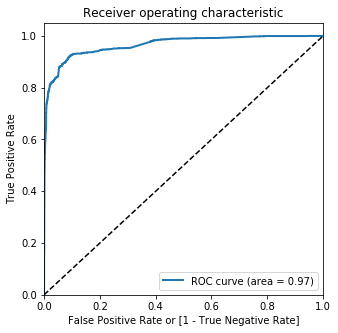

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Optimal cutoff point

The optimal cutoff probability is the probability where we get balanced sensitivity and specificity.

In [84]:
# Create columns with different probability cutoffs
num = [x/10 for x in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)

# Check head of the dataframe
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1384,0,0.139003,0,1,1,0,0,0,0,0,0,0,0
1,2019,1,0.942032,1,1,1,1,1,1,1,1,1,1,1
2,3514,1,0.992715,1,1,1,1,1,1,1,1,1,1,1
3,5930,0,0.204237,0,1,1,1,0,0,0,0,0,0,0
4,1409,0,0.138471,0,1,1,0,0,0,0,0,0,0,0


In [85]:
# Calculate accuracy, sensitivity and specificity for the probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(cm))
    accur = (cm[0,0]+cm[1,1]) / total
    speci = cm[0,0] / (cm[0,0]+cm[0,1])
    sensi = cm[1,1] / (cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[i, accur, sensi, speci]

# Check the dataframe
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.383342,1.000000,0.000000
0.1,0.1,0.792775,0.953752,0.692704
0.2,0.2,0.909015,0.929319,0.896393
0.3,0.3,0.913196,0.908377,0.916192
0.4,0.4,0.917377,0.889616,0.934635
0.5,0.5,0.910687,0.841623,0.953621
0.6,0.6,0.914200,0.820681,0.972335
0.7,0.7,0.913531,0.807592,0.979387
0.8,0.8,0.903663,0.770506,0.986439
0.9,0.9,0.887105,0.718150,0.992135


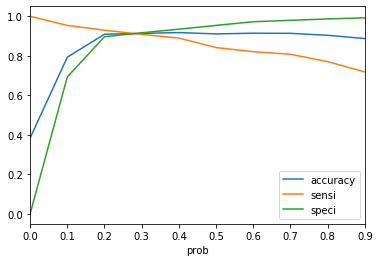

In [86]:
# Plot accuracy, sensitivity and specificity for the different probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above plot, 0.3 is the optimal point to take as cutoff probability.

#### Cutoff probability as 0.3

In [87]:
# Create new column 'final_predicted' with 1 if Converted_Prob > 0.3, else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.3 else 0)

# Check head of the dataframe
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1384,0,0.139003,0,1,1,0,0,0,0,0,0,0,0,0
1,2019,1,0.942032,1,1,1,1,1,1,1,1,1,1,1,1
2,3514,1,0.992715,1,1,1,1,1,1,1,1,1,1,1,1
3,5930,0,0.204237,0,1,1,1,0,0,0,0,0,0,0,0
4,1409,0,0.138471,0,1,1,0,0,0,0,0,0,0,0,0


In [88]:
# Find the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,
                                     y_train_pred_final.final_predicted)
print(confusion)

[[3378  309]
 [ 210 2082]]


In [89]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9131961866532865

In [90]:
# Assign values from the confusion matrix
TP = confusion[1,1]    # True positives
TN = confusion[0,0]    # True negatives
FP = confusion[0,1]    # False positives
FN = confusion[1,0]    # False negatives

In [91]:
# Check the sensitivity
TP / (TP+FN)

0.9083769633507853

In [92]:
# Check the specificity
TN / (TN+FP)

0.9161920260374288

#### Precision and recall

In [93]:
# Find precision
TP / (TP+FP)

0.8707653701380176

In [94]:
# Find recall
TP / (TP+FN)

0.9083769633507853

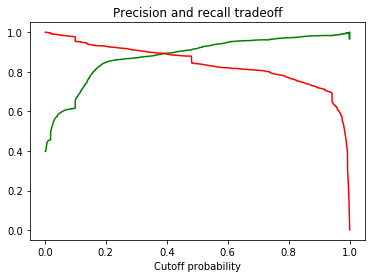

In [95]:
# Plot precision recall curve
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted,
                                                  y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision and recall tradeoff")
plt.xlabel("Cutoff probability");

### 5. Predictions and lead scoring

#### Rescaling on test set

In [96]:
# Apply scaling (only transform) on the test set
X_test[cont3] = scaler.transform(X_test[cont3])

In [97]:
# Check summary statistics for test set after normalisation
X_test[cont3].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2563.000000,2563.000000,2563.000000
mean,0.253928,0.206142,0.350928
std,0.215858,0.235249,0.278800
min,0.000000,0.000000,0.000000
25%,0.090909,0.000880,0.166667
50%,0.272727,0.102553,0.333333
75%,0.363636,0.389525,0.500000
max,1.000000,0.941901,1.000000


#### Predictions on test set

In [98]:
# Include features from the final model
cols2 = X.columns
X_test = X_test[cols2]

# Add a constant
X_test_sm = sm.add_constant(X_test)

In [99]:
# Get the predicted probabilities on the test set
y_test_pred = logm4.predict(X_test_sm)
y_test_pred.head()

7191    0.021488
1008    0.119037
3494    0.998362
3298    0.996146
5646    0.995555
dtype: float64

In [100]:
# Create a dataframe with the actual converted flag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'LeadID':y_test.index,'Converted':y_test.values,
                                   'Converted_Prob':y_test_pred.values})

# Check head of the dataframe
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob
0,7191,0,0.021488
1,1008,1,0.119037
2,3494,1,0.998362
3,3298,1,0.996146
4,5646,1,0.995555


In [101]:
# Create new column 'final_predicted' with 1 if Converted_Prob > 0.3, else 0
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x>0.3 else 0)

# Check head of the dataframe
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,7191,0,0.021488,0
1,1008,1,0.119037,0
2,3494,1,0.998362,1
3,3298,1,0.996146,1
4,5646,1,0.995555,1


In [102]:
# Find the confusion matrix 
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted,
                                     y_test_pred_final.final_predicted)
print(confusion2)

[[1505  118]
 [  84  856]]


In [103]:
# Check overall accuracy of the model
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.9211861100273118

In [104]:
# Assign values from the confusion matrix
TP = confusion2[1,1]    # True positives
TN = confusion2[0,0]    # True negatives
FP = confusion2[0,1]    # False positives
FN = confusion2[1,0]    # False negatives

In [105]:
# Check sensitivity/recall of the model
TP / (TP+FN)

0.9106382978723404

In [106]:
# Check specificity of the model
TN / (TN+FP)

0.9272951324707333

In [107]:
# Check precision of the model
TP / (TP+FP)

0.8788501026694046

We find the accuracy, sensitivity and specificity of the model to be greater than 90%.

#### Lead scoring

We will assign lead scores from 0 to 100 by multiplying the predicted probabilities for lead conversion by 100, and rounding off to integral values.

In [108]:
# Create 'Lead Score' column for train set
lead_score = lambda x: int(round(x*100))
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_Prob'].apply(lead_score)

# Check head of the dataframe
y_train_pred_final.head()

,LeadID,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1384,0,0.139003,0,1,1,0,0,0,0,0,0,0,0,0,14
1,2019,1,0.942032,1,1,1,1,1,1,1,1,1,1,1,1,94
2,3514,1,0.992715,1,1,1,1,1,1,1,1,1,1,1,1,99
3,5930,0,0.204237,0,1,1,1,0,0,0,0,0,0,0,0,20
4,1409,0,0.138471,0,1,1,0,0,0,0,0,0,0,0,0,14


In [109]:
# Create 'Lead Score' column for test set
y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Prob'].apply(lead_score)

# Check head of the dataframe
y_test_pred_final.head()

,LeadID,Converted,Converted_Prob,final_predicted,Lead Score
0,7191,0,0.021488,0,2
1,1008,1,0.119037,0,12
2,3494,1,0.998362,1,100
3,3298,1,0.996146,1,100
4,5646,1,0.995555,1,100


In [110]:
# Concatenate lead scores of train and test sets
cols3 = ['LeadID','Lead Score']
lead_score = pd.concat([y_train_pred_final[cols3], y_test_pred_final[cols3]])

# Check head of the dataframe
lead_score.head()

,LeadID,Lead Score
0,1384,14
1,2019,94
2,3514,99
3,5930,20
4,1409,14


In [111]:
# Create a dataframe with the lead identifiers
identifier = pd.DataFrame({'LeadID':prospect_id.index,'Prospect ID':prospect_id.values,
                           'Lead Number':lead_number.values})

# Check head of the dataframe
identifier.head()

,LeadID,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [112]:
# Check shape of identifier and lead score dataframe
print(identifier.shape)
print(lead_score.shape)

(8542, 3)
(8542, 2)


In [113]:
# Assign the lead scores to the identifier dataframe
lead_score_final = identifier.merge(lead_score, on='LeadID')

# Drop 'LeadID' column
lead_score_final = lead_score_final.drop('LeadID', axis=1)

# Check head of the dataframe
lead_score_final.head()

,Prospect ID,Lead Number,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,99
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,95


In [114]:
# Check tail of the dataframe
lead_score_final.tail()

,Prospect ID,Lead Number,Lead Score
8537,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,99
8538,82a7005b-7196-4d56-95ce-a79f937a158d,579546,56
8539,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,3
8540,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,64
8541,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,99


A lead score greater than 30 can be considered as cutoff for good conversion rate (hot leads).